In [ ]:
# ResNet50 Code created by Amrita Ballurkar

In [1]:
!pip install imageai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 2.3 MB/s eta 0:00:00


In [2]:
#import statements
from PIL import Image 
import numpy as np
import os
import imageio
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import keras 
import imageai
from imageai.Classification.Custom import ClassificationModelTrainer
import datetime
tf.disable_v2_behavior()

%matplotlib inline

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(
Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#mounted google drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#trained model as ResNet50
execution_path = 'drive/MyDrive/'
prediction = ClassificationModelTrainer()
prediction.setModelTypeAsResNet50()
prediction.setDataDirectory(execution_path + "images")
prediction.trainModel(num_experiments=100, batch_size=32)

In [9]:
from imageai.Classification.Custom import CustomImageClassification

#load trained model
predictor = CustomImageClassification()
predictor.setModelTypeAsResNet50()
predictor.setModelPath(execution_path + "images/models/resnet50-images-test_acc_0.59091_epoch-31.pt")
predictor.setJsonPath(execution_path + "images/models/images_model_classes.json")
predictor.loadModel()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [13]:
#print test predictions 
predictions, probabilities = predictor.classifyImage(execution_path + "images/TEST_SIMPLE/MONOCYTE/_0_5020.jpeg", result_count=3)

for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)

EOSINOPHIL  :  38.2419
MONOCYTE  :  28.1179
LYMPHOCYTE  :  16.9908


In [21]:
#get predictions for test images
test_path = execution_path + "images/test/"
test_classes = ["EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL"]
for test_class in test_classes:
  dir = os.listdir(test_path + test_class)
  print("~~~~~~~~~~" + test_class + "~~~~~~~~~~")
  for image in dir[:10]:
    predictions, probabilities = predictor.classifyImage(test_path + test_class + '/' + image, result_count=3)
    for eachPrediction, eachProbability in zip(predictions, probabilities):
      print(eachPrediction , " : " , eachProbability)
    print("-------------------------------")


~~~~~~~~~~EOSINOPHIL~~~~~~~~~~
MONOCYTE  :  36.6237
EOSINOPHIL  :  27.9879
LYMPHOCYTE  :  22.4412
-------------------------------
EOSINOPHIL  :  42.7142
MONOCYTE  :  25.9346
NEUTROPHIL  :  18.4089
-------------------------------
EOSINOPHIL  :  63.4578
NEUTROPHIL  :  24.6803
MONOCYTE  :  8.9704
-------------------------------
LYMPHOCYTE  :  43.8697
MONOCYTE  :  35.684
EOSINOPHIL  :  13.9404
-------------------------------
MONOCYTE  :  33.2029
EOSINOPHIL  :  32.2228
LYMPHOCYTE  :  19.9792
-------------------------------
EOSINOPHIL  :  49.8238
NEUTROPHIL  :  21.4815
MONOCYTE  :  19.5166
-------------------------------
EOSINOPHIL  :  33.9626
MONOCYTE  :  32.0147
LYMPHOCYTE  :  18.5844
-------------------------------
EOSINOPHIL  :  47.1391
MONOCYTE  :  22.2925
NEUTROPHIL  :  20.0783
-------------------------------
MONOCYTE  :  38.5132
LYMPHOCYTE  :  38.1828
EOSINOPHIL  :  15.753
-------------------------------
MONOCYTE  :  37.2107
LYMPHOCYTE  :  28.7173
EOSINOPHIL  :  23.4178
--------------

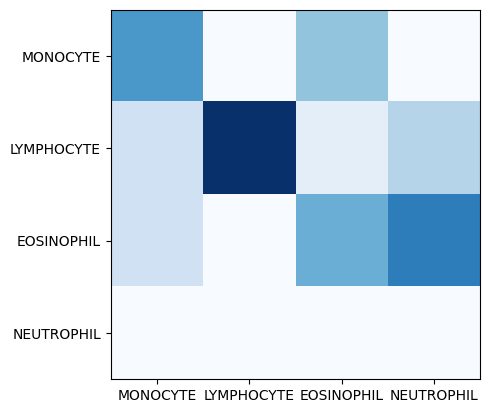

In [33]:
import matplotlib.pyplot as plt
import numpy as np

#create confidence matrix from calculations
conf = np.array([[6, 0, 4, 0], [2, 10, 1, 3], [2, 0, 5, 7], [0, 0, 0, 0]])

plt.imshow(conf, interpolation='none', cmap='Blues')
plt.xticks(np.arange(0, 4), ['MONOCYTE', 'LYMPHOCYTE', 'EOSINOPHIL', 'NEUTROPHIL'])
plt.yticks(np.arange(0, 4), ['MONOCYTE', 'LYMPHOCYTE', 'EOSINOPHIL', 'NEUTROPHIL'])

plt.show()